In [1]:
import pandas as pd
import numpy as np
ds = pd.read_csv(r"C:\Users\KVarshith\OneDrive - RealPage\Documents\House_price_Prediction\House Price Prediction Dataset.csv")
df = pd.DataFrame(ds)
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [2]:
df.drop("Id", axis = 1, inplace=True)
df.head(5)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [4]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [6]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ["Location","Condition","Garage"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head(5)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056


In [8]:
#feature Extraction
X = df.drop("Price",axis=1)
Y = df["Price"]

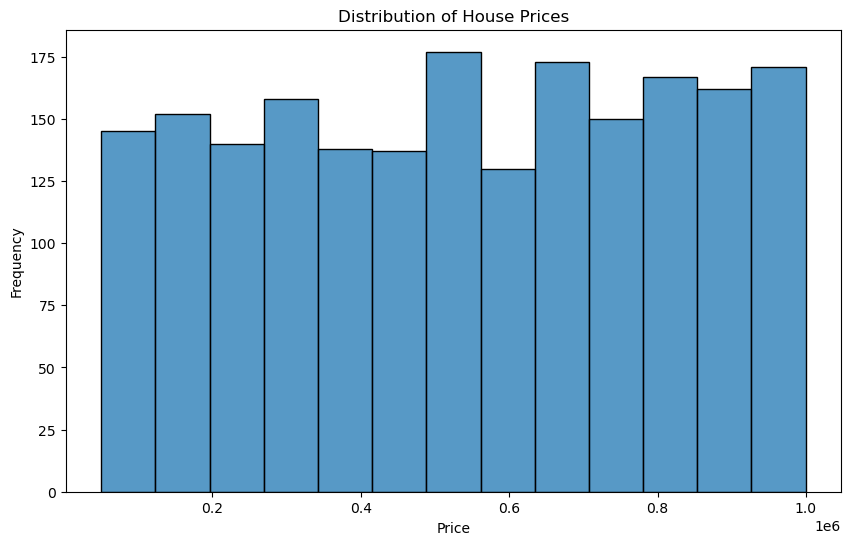

In [15]:
#Visualization the Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
#split into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=3)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R² Score"])
print(results_df)

                    Model           MSE  R² Score
0       Linear Regression  7.872942e+10 -0.011962
1           Random Forest  8.615720e+10 -0.107436
2       Gradient Boosting  8.051846e+10 -0.034957
3  Support Vector Machine  7.790260e+10 -0.001334
4     K-Nearest Neighbors  1.048238e+11 -0.347370


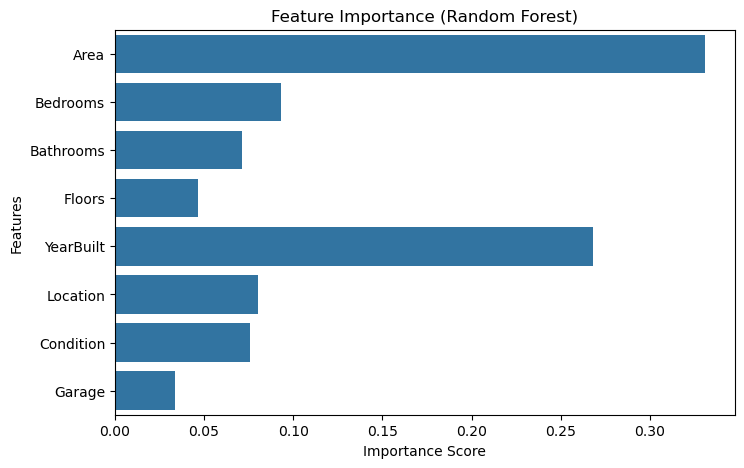

In [18]:
# Feature Importance (For Random Forest Model)
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

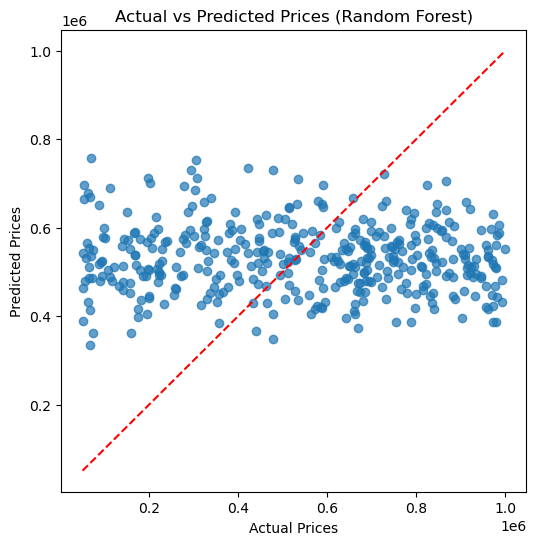

In [19]:
# Predicted vs Actual Prices Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, models["Random Forest"].predict(X_test), alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()